In [1]:
import math
import nwslpy
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from common import Fonts, Images, NWSL, Colors, add_twitter_handle, add_source

In [3]:
players = nwslpy.load_players()
seasons = list(map(lambda x: str(x), filter(lambda x: x != 2020, range(2016,2023))))
teams = ["RGN", "CHI"]
stats = pd.concat(
    [nwslpy.load_player_season_stats(team, season) for season, team in itertools.product(seasons, teams)]
)
stats

player_id  team_id  season  open_play_crosses_unsuccessful  minutes  \
0         150        6    2016                              17     1776   
1         158        6    2016                               2     1005   
2         137        6    2016                               1       46   
3         141        6    2016                               3      274   
4         151        6    2016                               5      157   
..        ...      ...     ...                             ...      ...   
19        318        2    2022                              23     1367   
20        395        2    2022                               0      653   
21        467        2    2022                              19      981   
22        462        2    2022                               0      783   
23         45        2    2022                               6      723   

    throw_ins_to_own_player  lay_offs_successful  launches_successful  goals  \
0                       117                    1                   12      1   
1                         9                    0                   12      1   
2                         1                    0                    0      0   
3                         3                    1                    0      0   
4                         0                    1                    0      0   
..                      ...                  ...                  ...    ...   
19                       14                    8                    1     11   
20                        0                    0                    3      0   
21                       61                    0                    1      2   
22                        0                   10                    0      4   
23                       25                    1                    9      0   

    passes_open_play  ...  drops  gk_smother  penalties_off_target  \
0               1068  ...    NaN         NaN                   NaN   
1                652  ...    NaN         NaN                   NaN   
2                 14  ...    NaN         NaN                   NaN   
3                111  ...    NaN         NaN                   NaN   
4                 68  ...    NaN         NaN                   NaN   
..               ...  ...    ...         ...                   ...   
19               448  ...    0.0         NaN                   NaN   
20               290  ...    0.0         NaN                   NaN   
21               350  ...    0.0         NaN                   NaN   
22               211  ...    0.0         NaN                   NaN   
23               369  ...    0.0         NaN                   NaN   

    assists_second  goals_conceded_penalty  red_cards_2nd_yellow  tackled  \
0              NaN                     NaN                   NaN      NaN   
1              NaN                     NaN                   NaN      NaN   
2              NaN                     NaN                   NaN      NaN   
3              NaN                     NaN                   NaN      NaN   
4              NaN                     NaN                   NaN      NaN   
..             ...                     ...                   ...      ...   
19             0.0                     0.0                   0.0     44.0   
20             0.0                     1.0                   0.0      1.0   
21             0.0                     1.0                   0.0     25.0   
22             0.0                     0.0                   0.0     49.0   
23             1.0                     0.0                   0.0      4.0   

    goals_home  goals_away  goals_win  
0          NaN         NaN        NaN  
1          NaN         NaN        NaN  
2          NaN         NaN        NaN  
3          NaN         NaN        NaN  
4          NaN         NaN        NaN  
..         ...         ...        ...  
19         6.0         5.0        5.0  
20         0.0         0.0        0.0  
21         1.0  

In [4]:
df = stats.groupby(["player_id", "season"]).first()
df = df.join(players[["player_match_name"]])
df

team_id  open_play_crosses_unsuccessful  minutes  \
player_id season                                                     
11        2017          2                              16     1424   
21        2018          2                              11      846   
          2019          2                               3      325   
24        2016          2                              39     1331   
          2017          2                               8      365   
...                   ...                             ...      ...   
661       2022          6                               0        2   
665       2022          6                               2     1352   
666       2022          6                               0       80   
667       2022          6                               0      126   
721       2022          6                               0      848   

                  throw_ins_to_own_player  lay_offs_successful  \
player_id season                                                 
11        2017                          3                   21   
21        2018                         95                    0   
          2019                         16                    0   
24        2016                         10                    5   
          2017                          2                    5   
...                                   ...                  ...   
661       2022                          2                    0   
665       2022                          1                    0   
666       2022                          0                    0   
667       2022                          0                    4   
721       2022                          1                    9   

                  launches_successful  goals  passes_open_play  corners_won  \
player_id season                                                              
11        2017                      1      3               544           18   
21        2018                      2      0               335            5   
          2019                      3      2               115            2   
24        2016                      1      2               218           24   
          2017                      0      0                74            6   
...                               ...    ...               ...          ...   
661       2022                      0      0                 4            0   
665       2022                      2      0               601            1   
666       2022                      0      0                16            0   
667       2022                      0      1                67            0   
721       2022                      0      2               233           11   

                  passes_backwards  ...  gk_smother  penalties_off_target  \
player_id season                    ...                                     
11        2017                 114  ...         0.0                   0.0   
21        2018                  64  ...         0.0                   NaN   
          2019                  22  ...         0.0                   NaN   
24        2016                  75  ...         NaN                   NaN   
          2017                  26  ...         0.0                   0.0   
...                            ...  ...         ...                   ...   
661       2022                   0  ...         0.0                   NaN   
665       2022                  83  ...         0.0                   NaN   
666       2022                   3  ...         0.0                   NaN   
667       2022                  16  ...         0.0                   NaN   
721       2022                  58  ...         0.0                   NaN   

                  assists_second  goals_conceded_penalty  \
player_id season                                           
11        2017               NaN                     NaN   
21        2018               0.0      

In [5]:
def player_summary(name):
    subset = df[df["player_match_name"] == name].dropna(axis=1)

    plt.clf()
    plt.rcParams["figure.figsize"] = (24, 50)
    cols = 5
    fig, axs = plt.subplots(math.ceil(len(subset.columns) / cols), cols)

    for i, col in enumerate(subset.columns):
        ax = axs[int(i / cols), i % cols]
        y = subset[col]
        if col != "minutes" and y.dtype == 'int64':
            y = y * 90 / subset["minutes"]
            col = col + "_per_90"
        ax.plot(subset.index.get_level_values(1), y)
        ax.set_title(col)

    plt.tight_layout()

<Figure size 432x288 with 0 Axes>

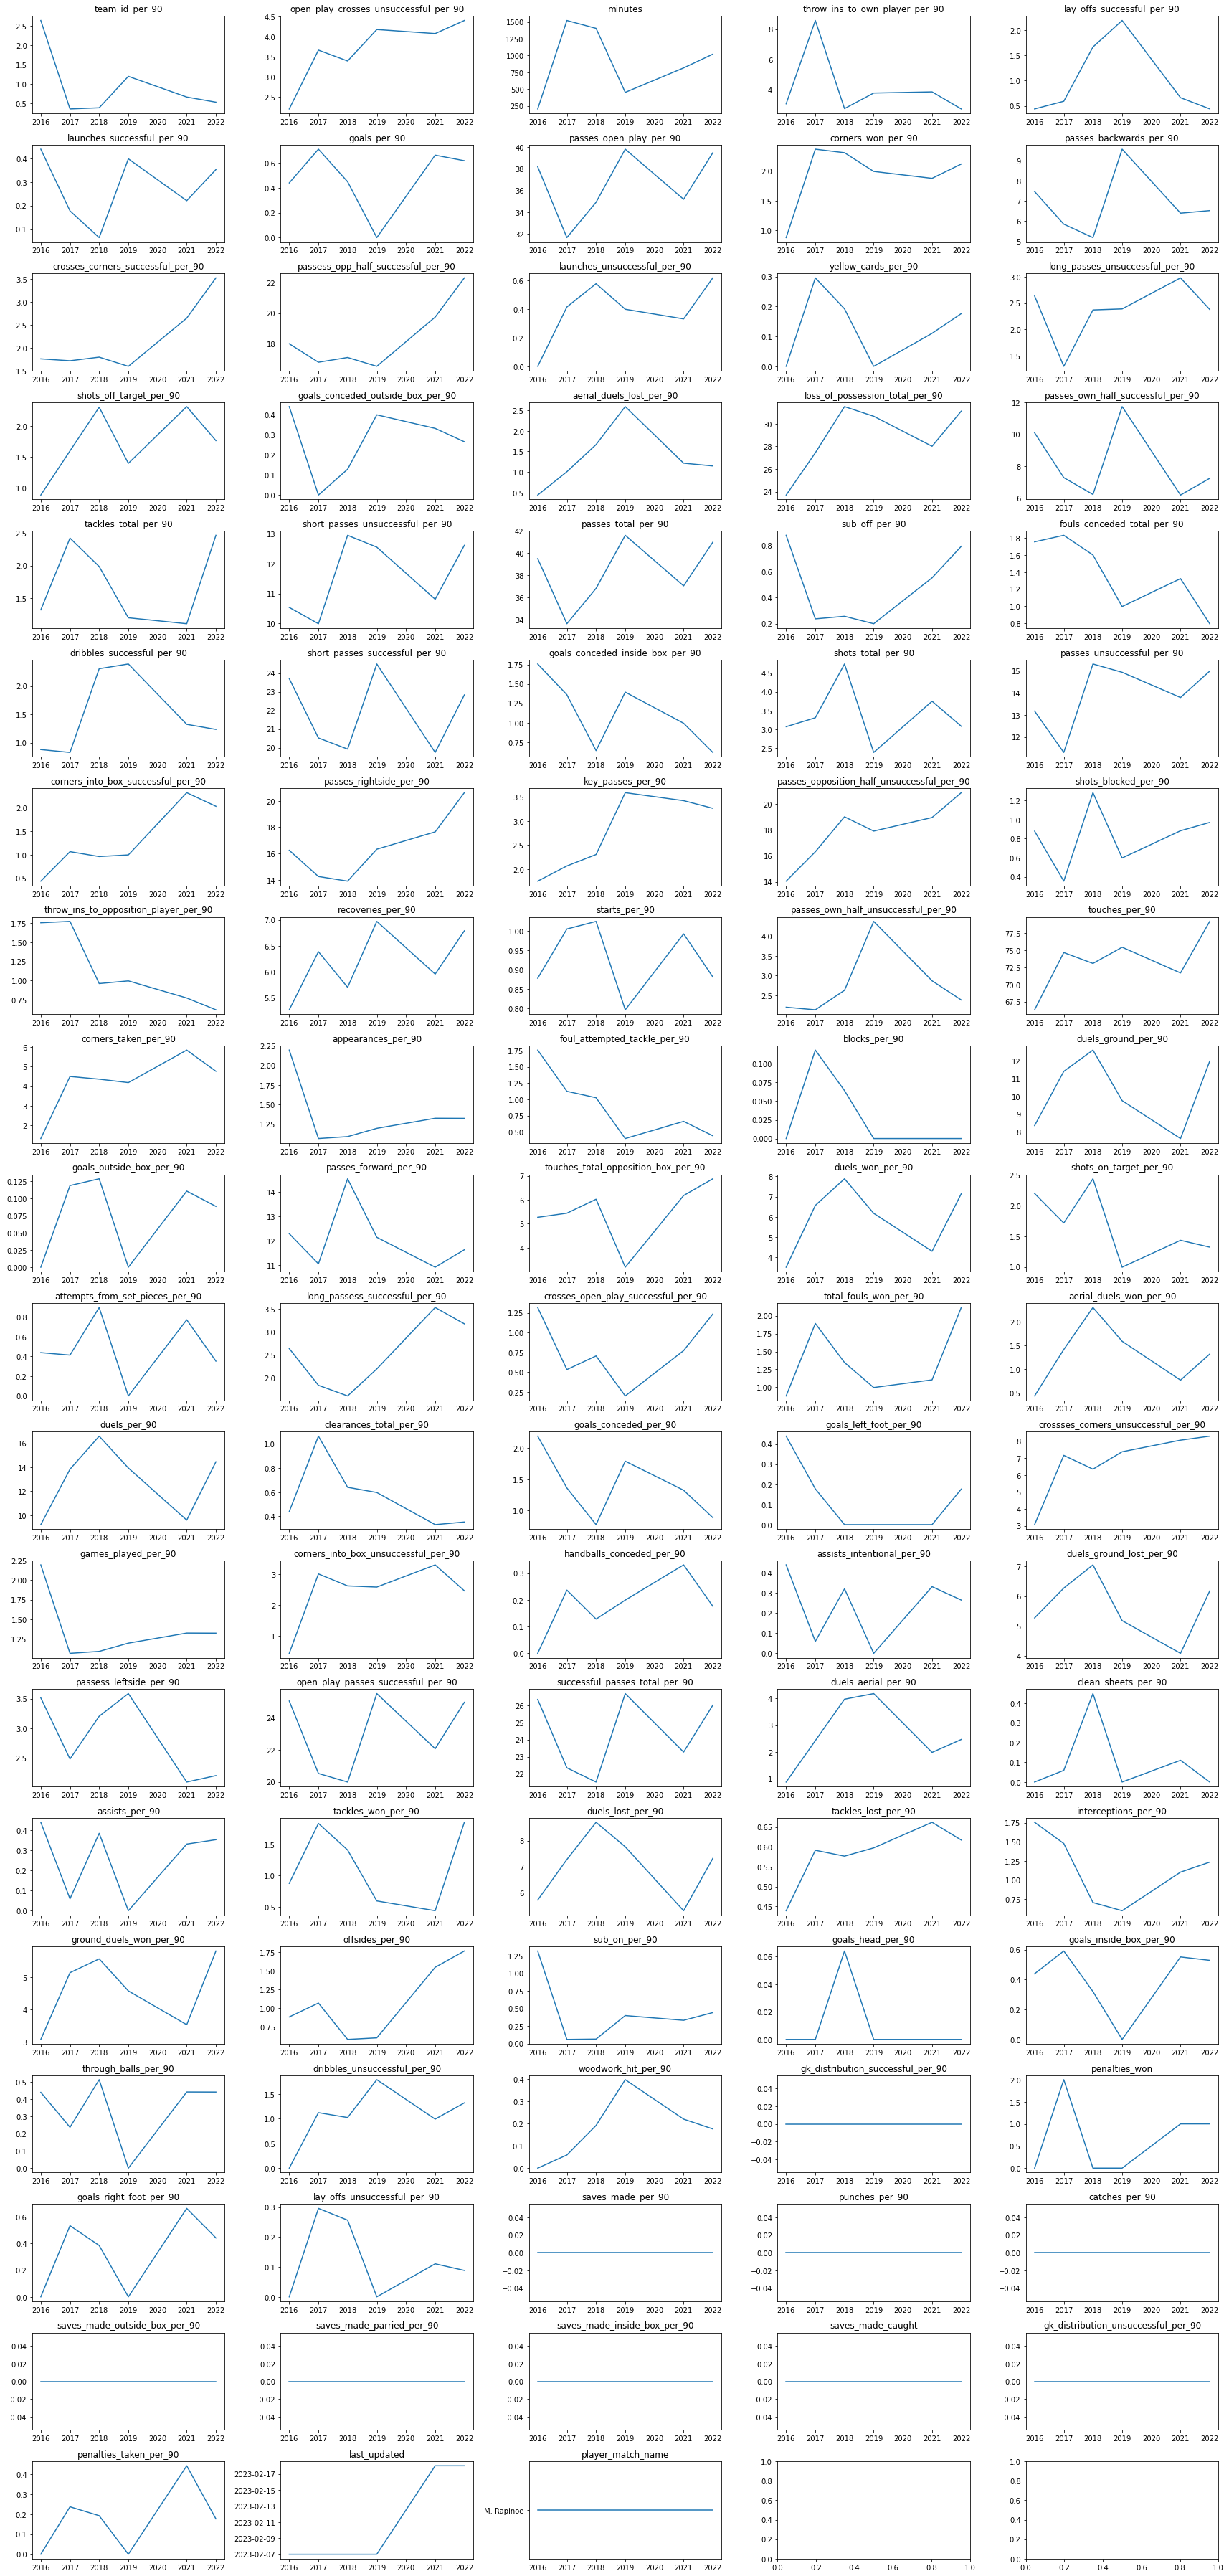

In [6]:
player_summary("M. Rapinoe")

<Figure size 1728x3600 with 0 Axes>

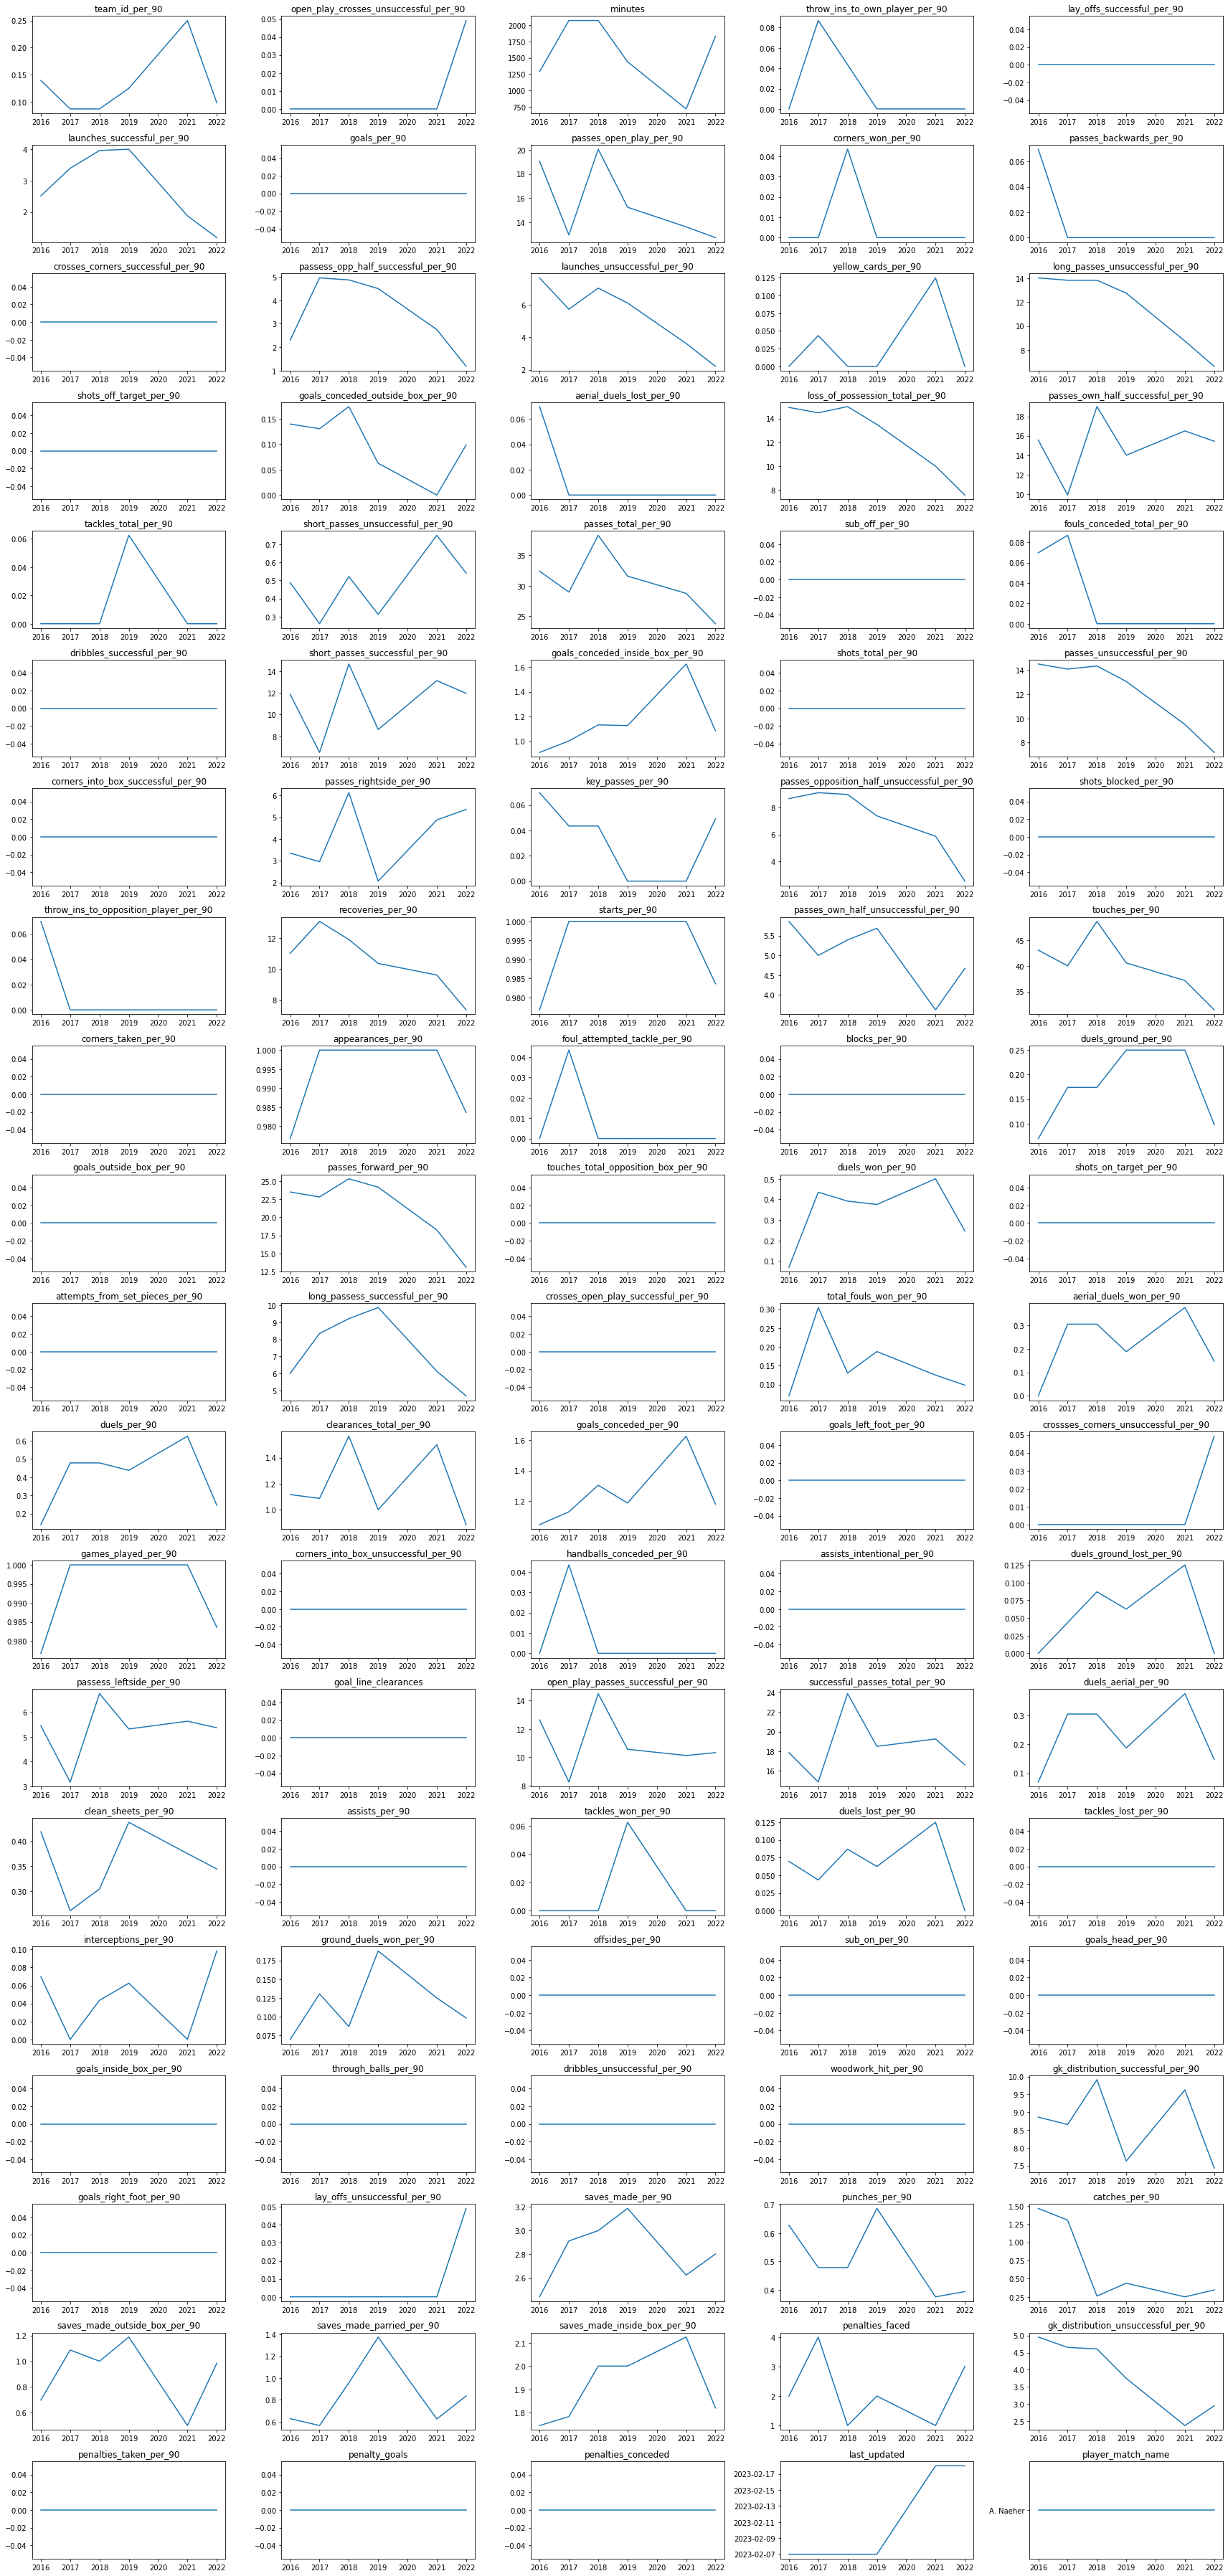

In [8]:
player_summary("A. Naeher")

<Figure size 1728x3600 with 0 Axes>

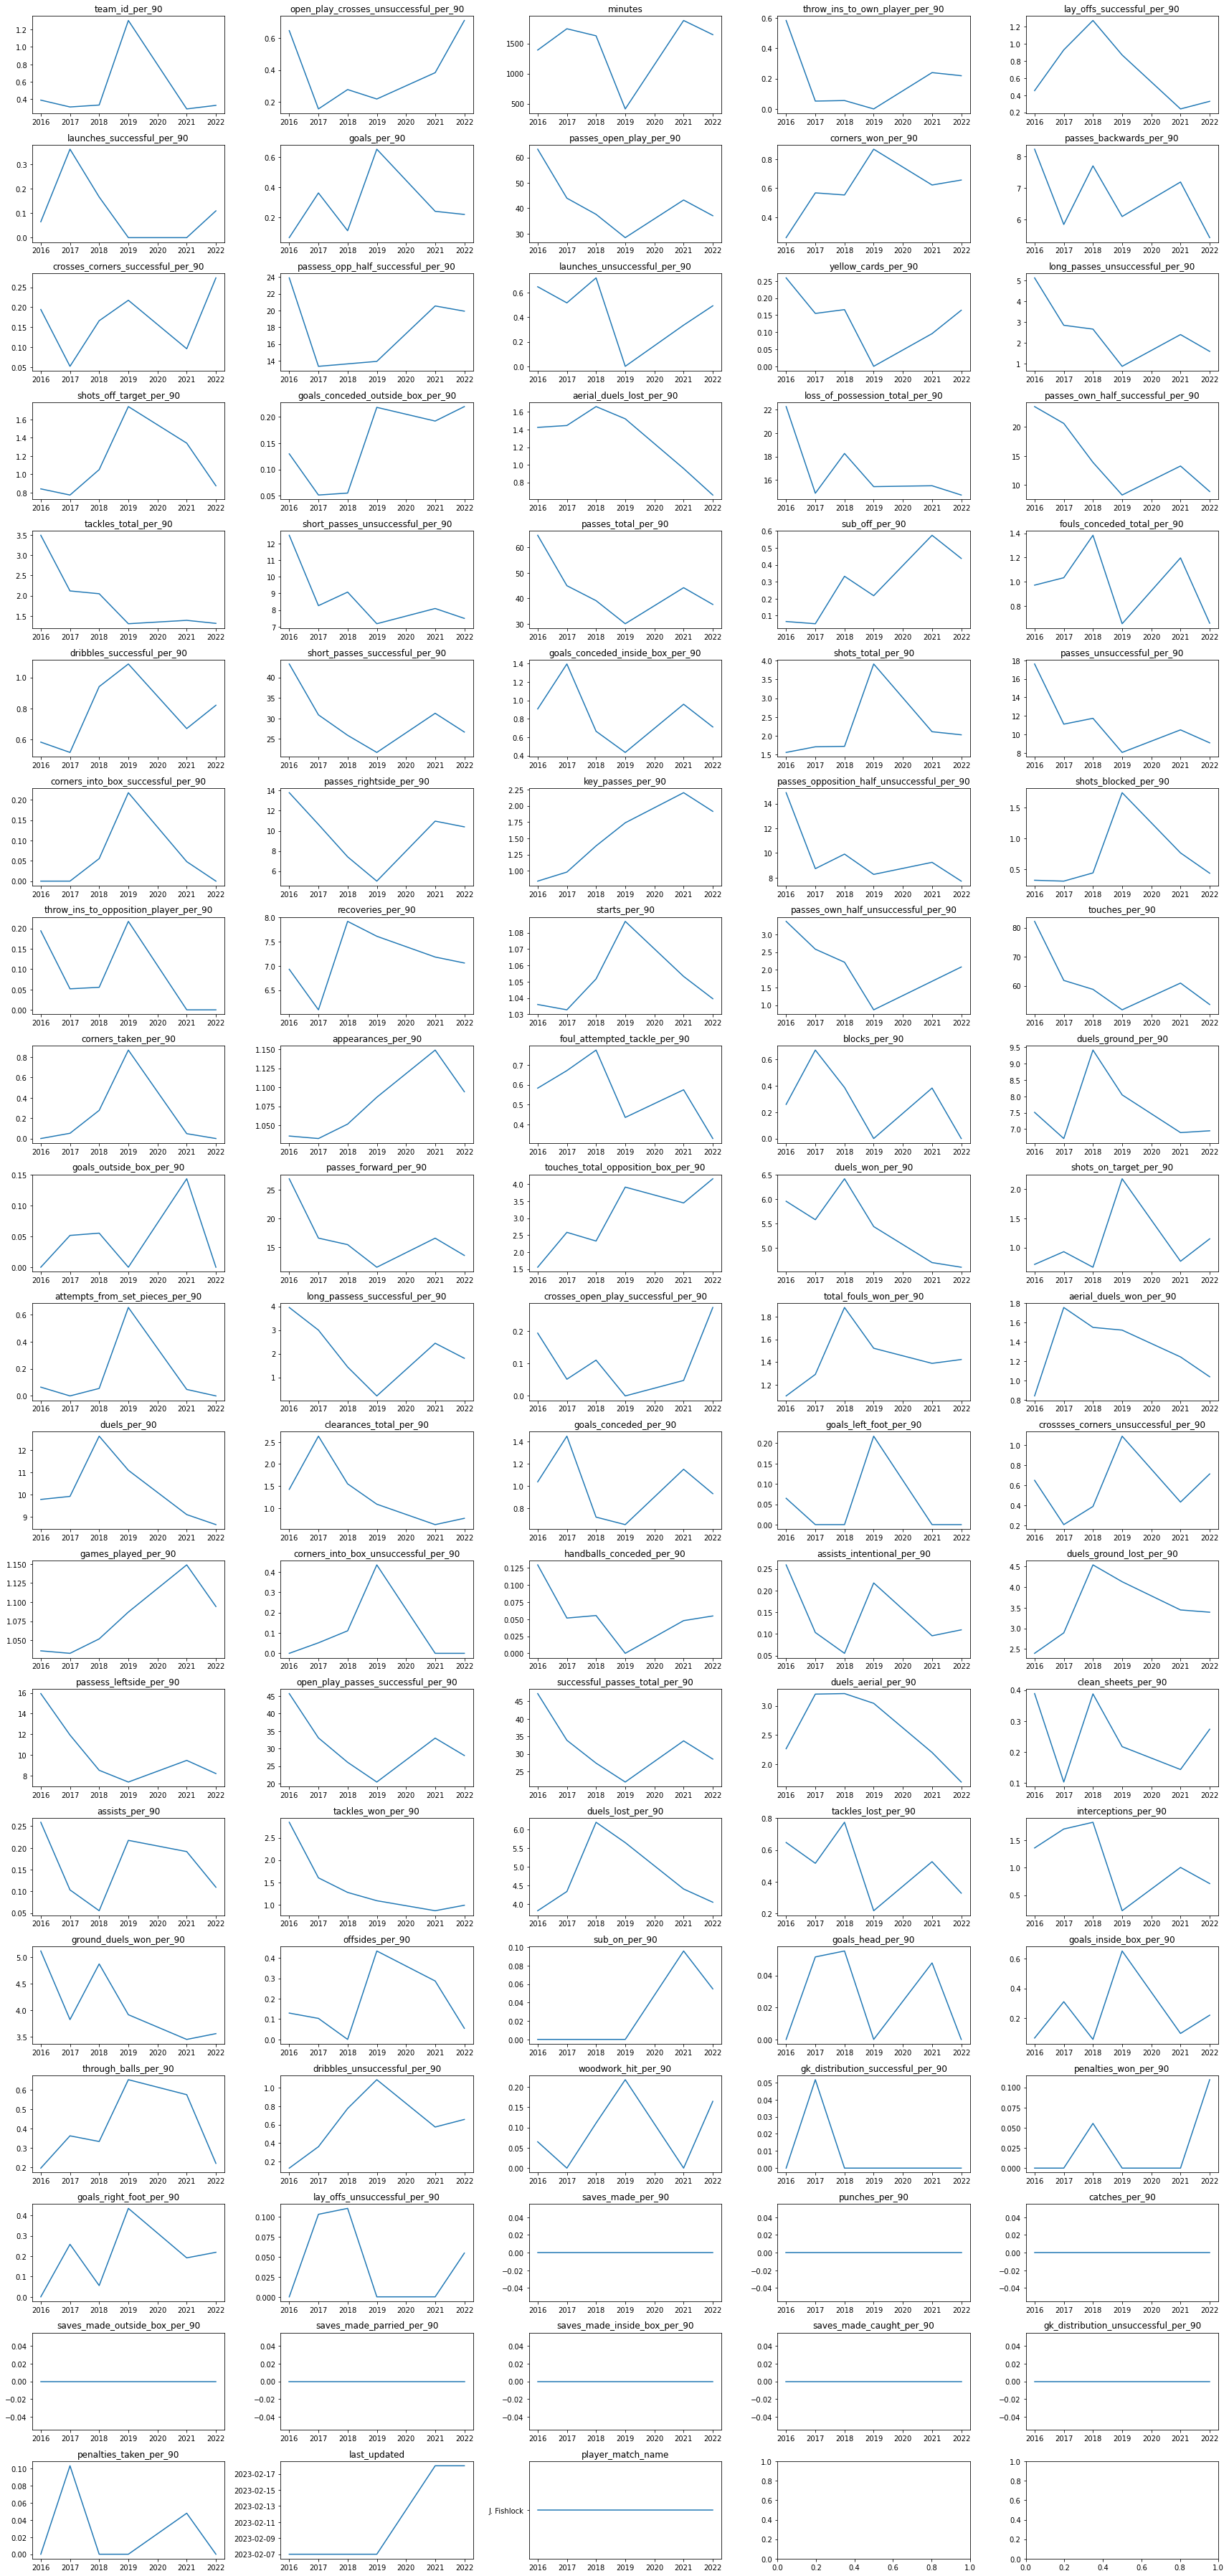

In [20]:
player_summary("J. Fishlock")

<Figure size 1728x3600 with 0 Axes>

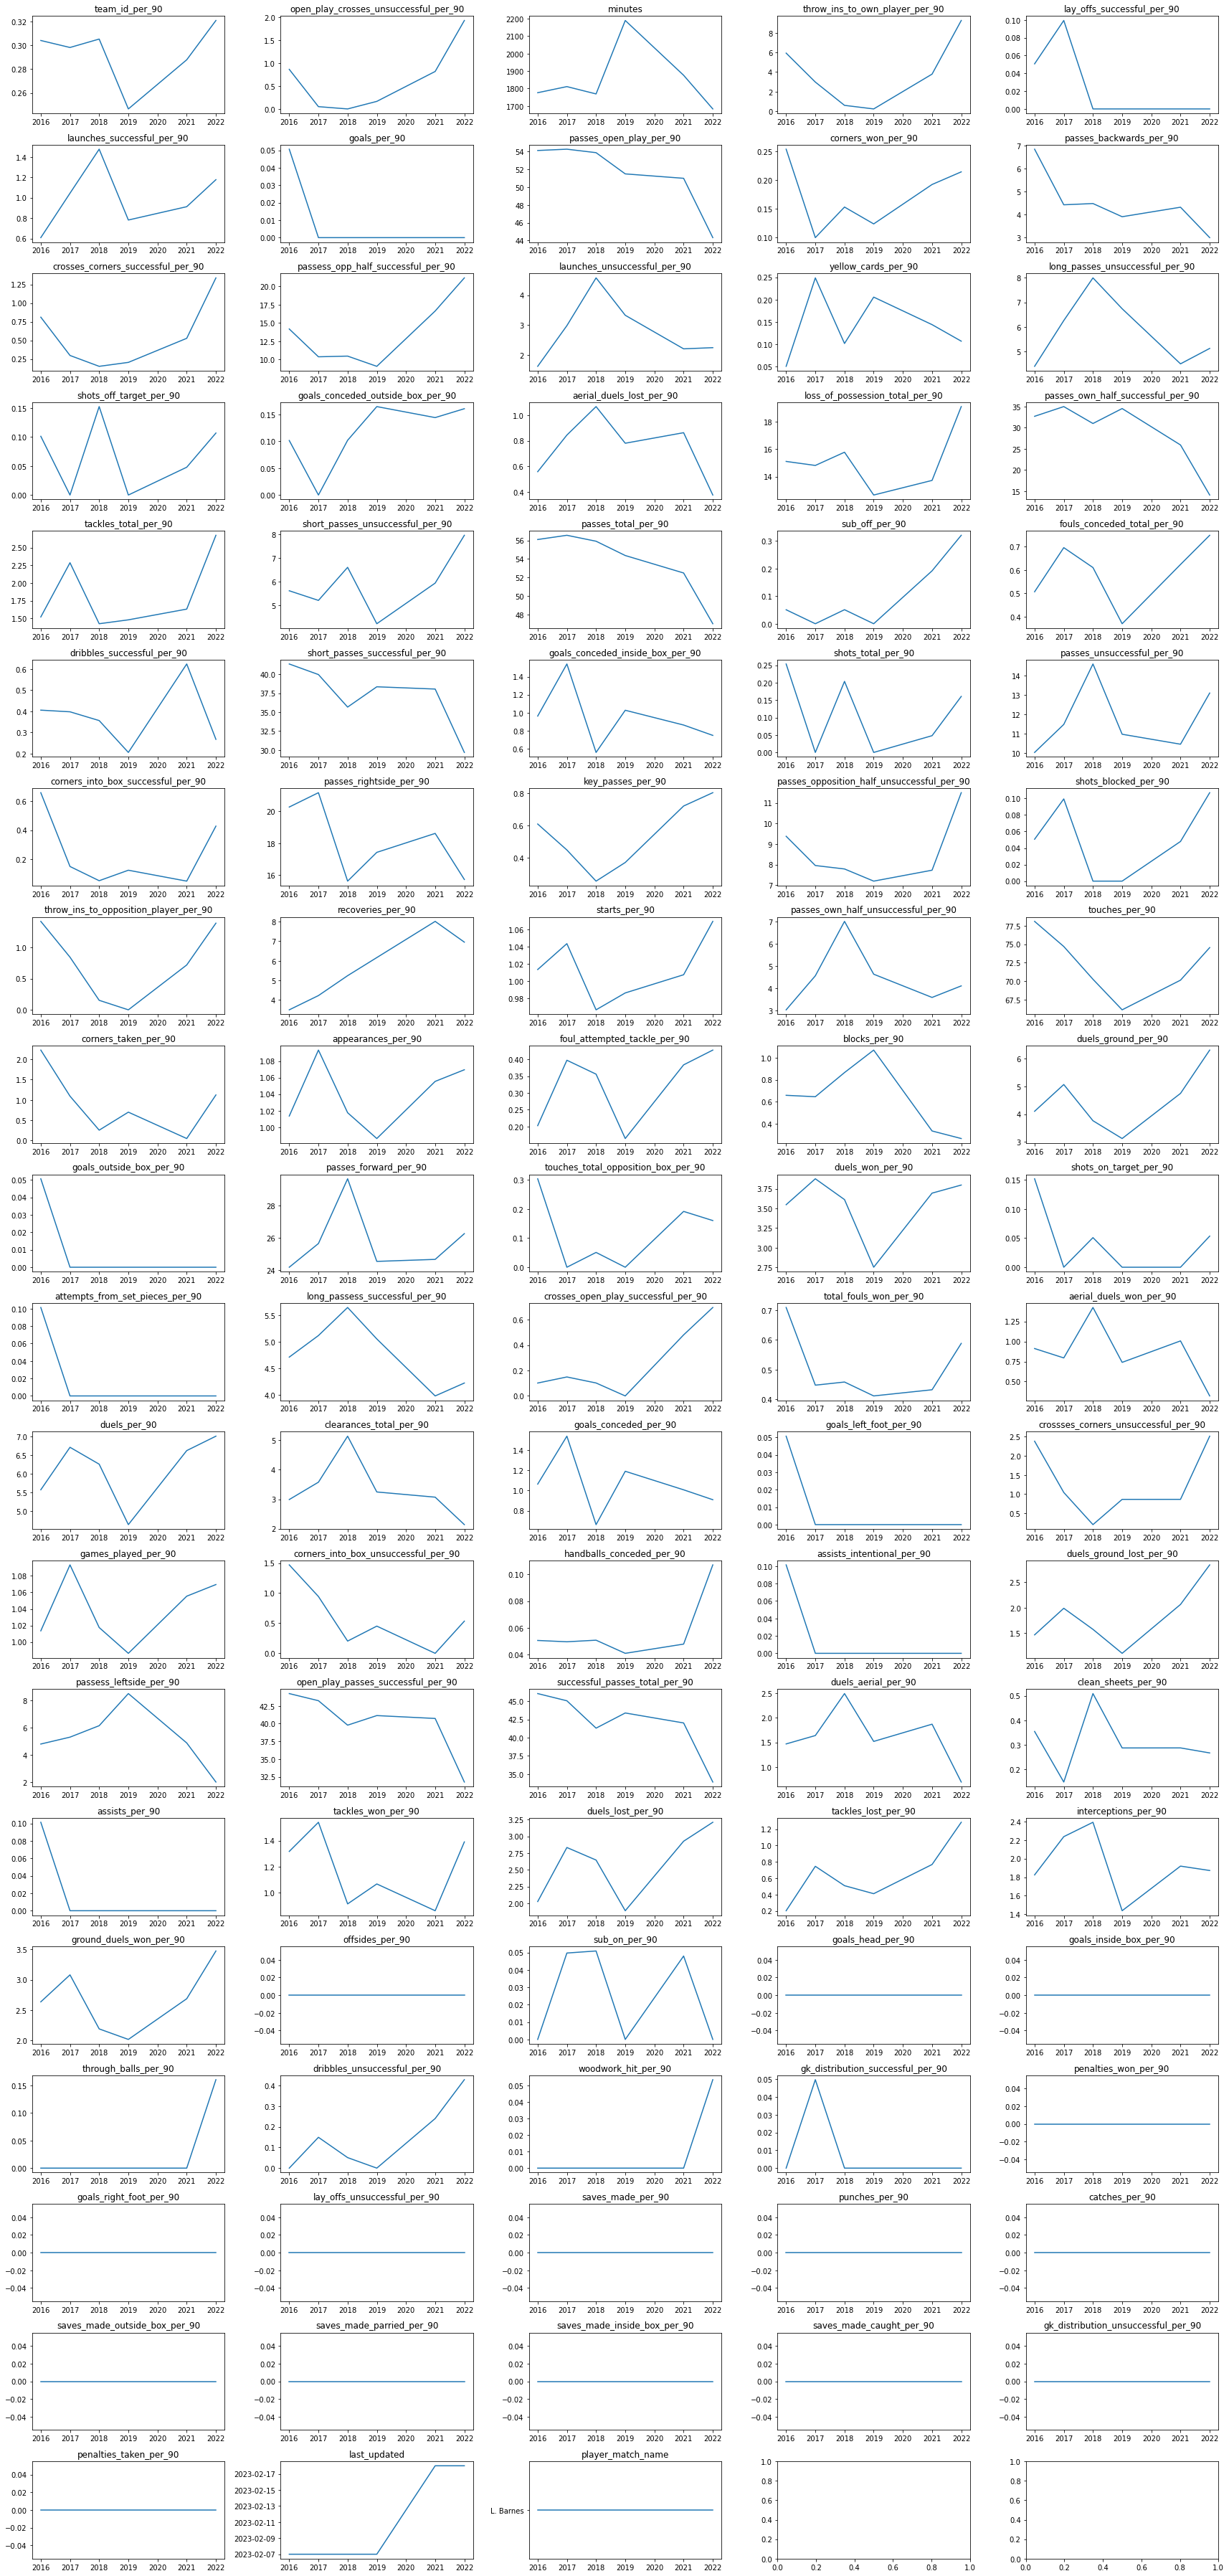

In [21]:
player_summary("L. Barnes")

<Figure size 1728x3600 with 0 Axes>

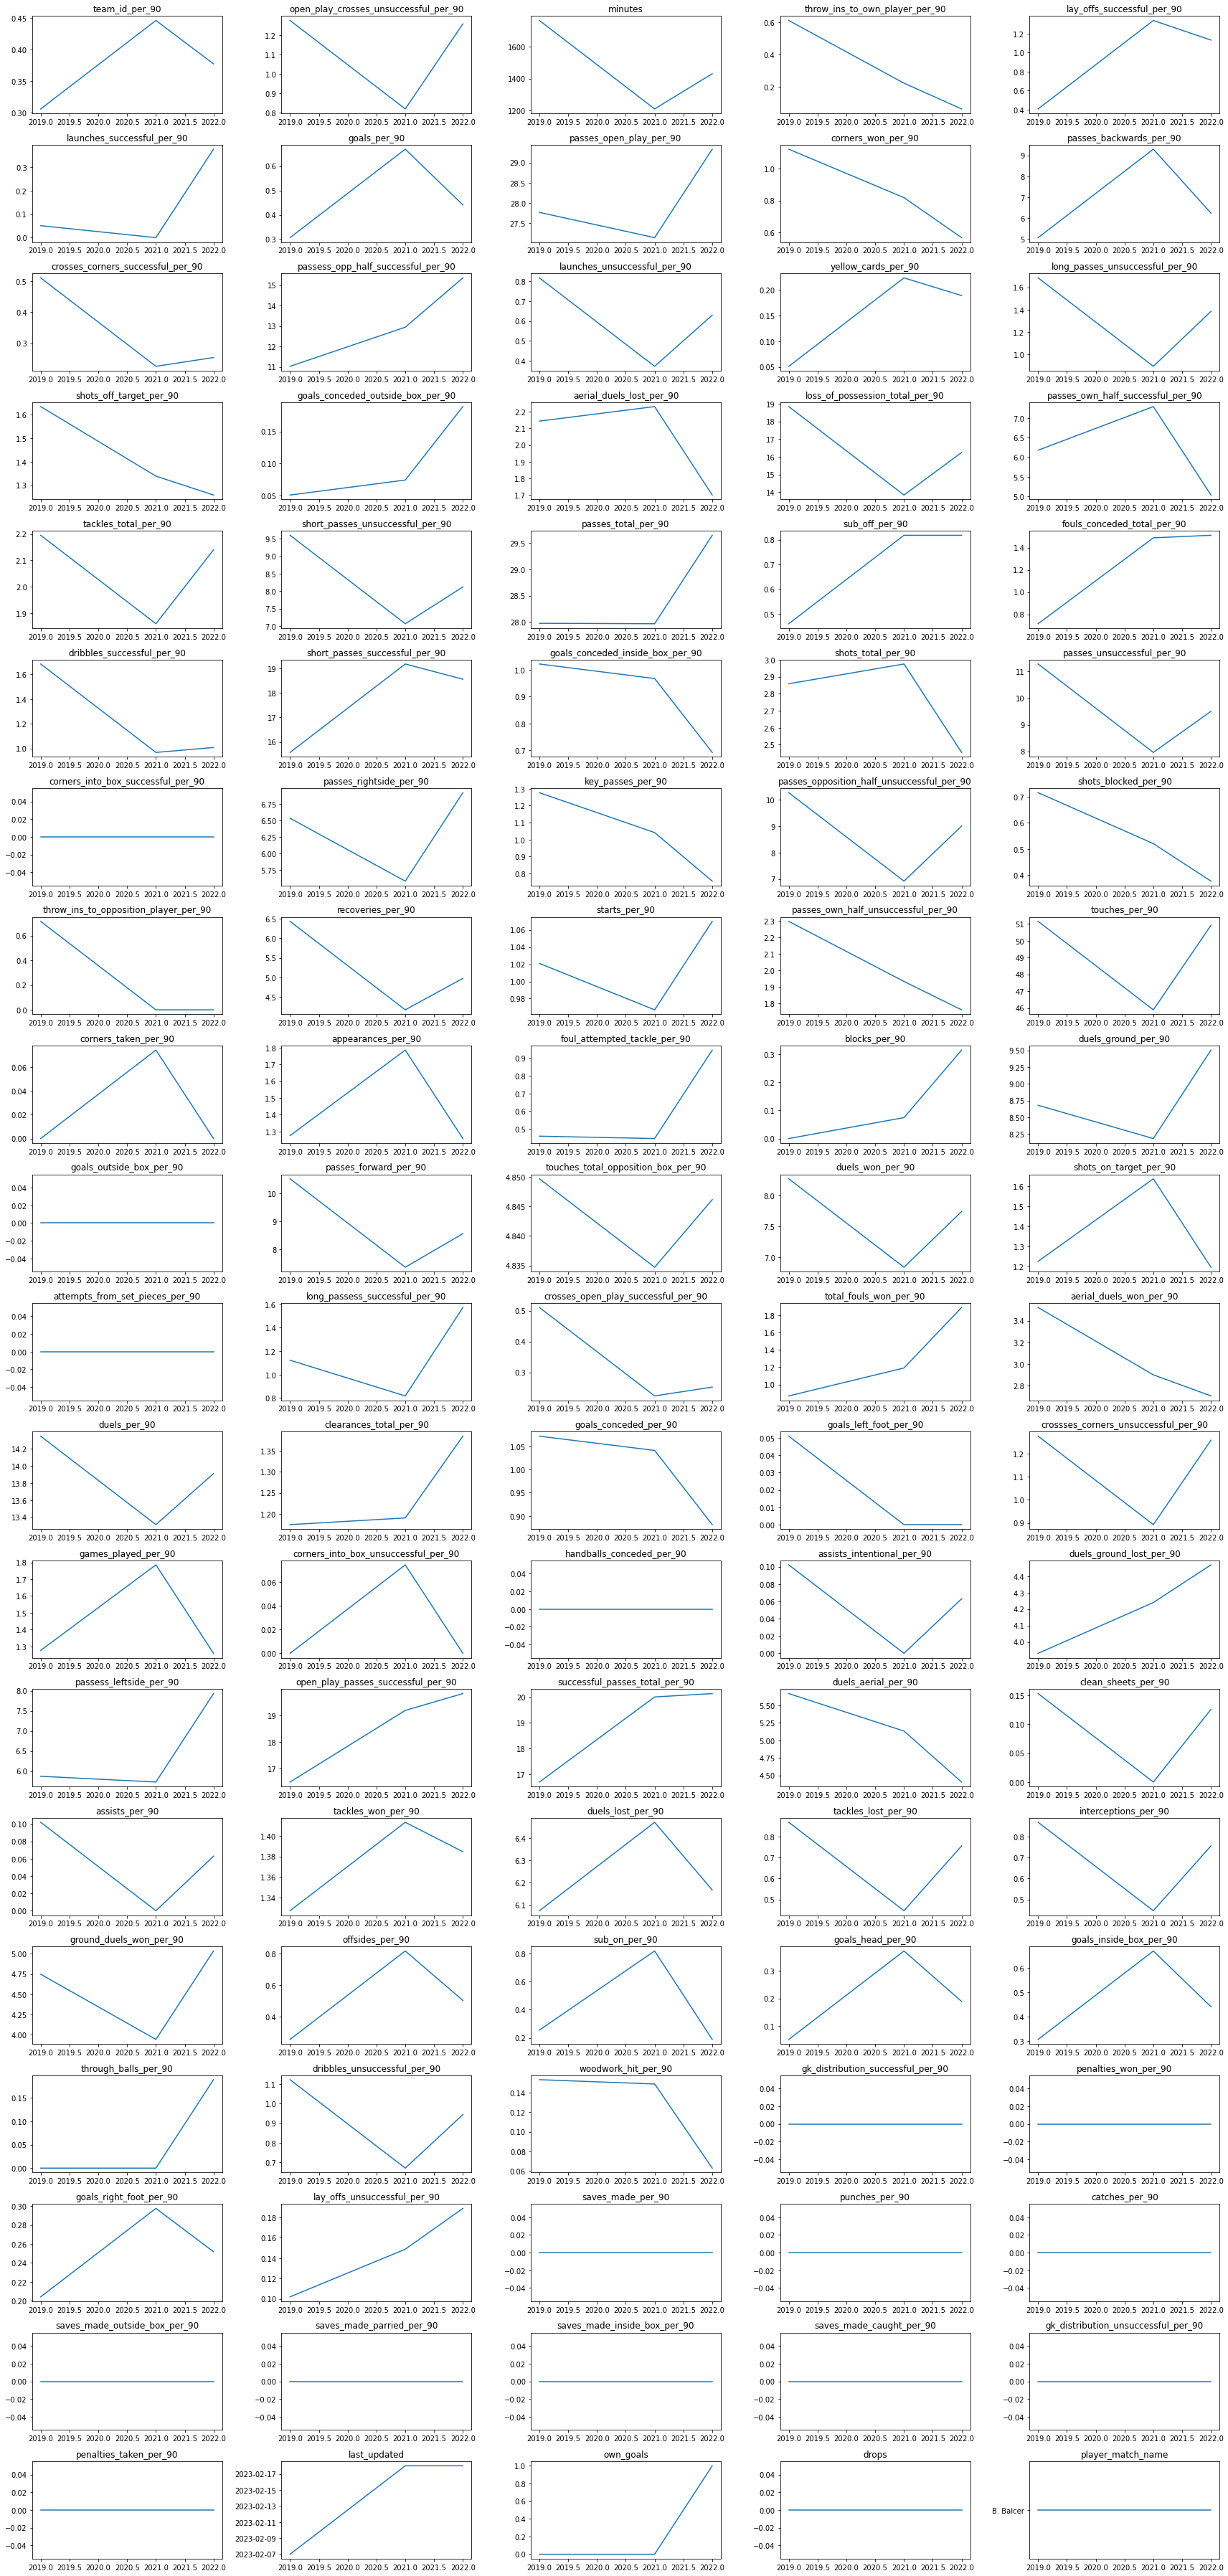

In [22]:
player_summary("B. Balcer")

<Figure size 1728x3600 with 0 Axes>

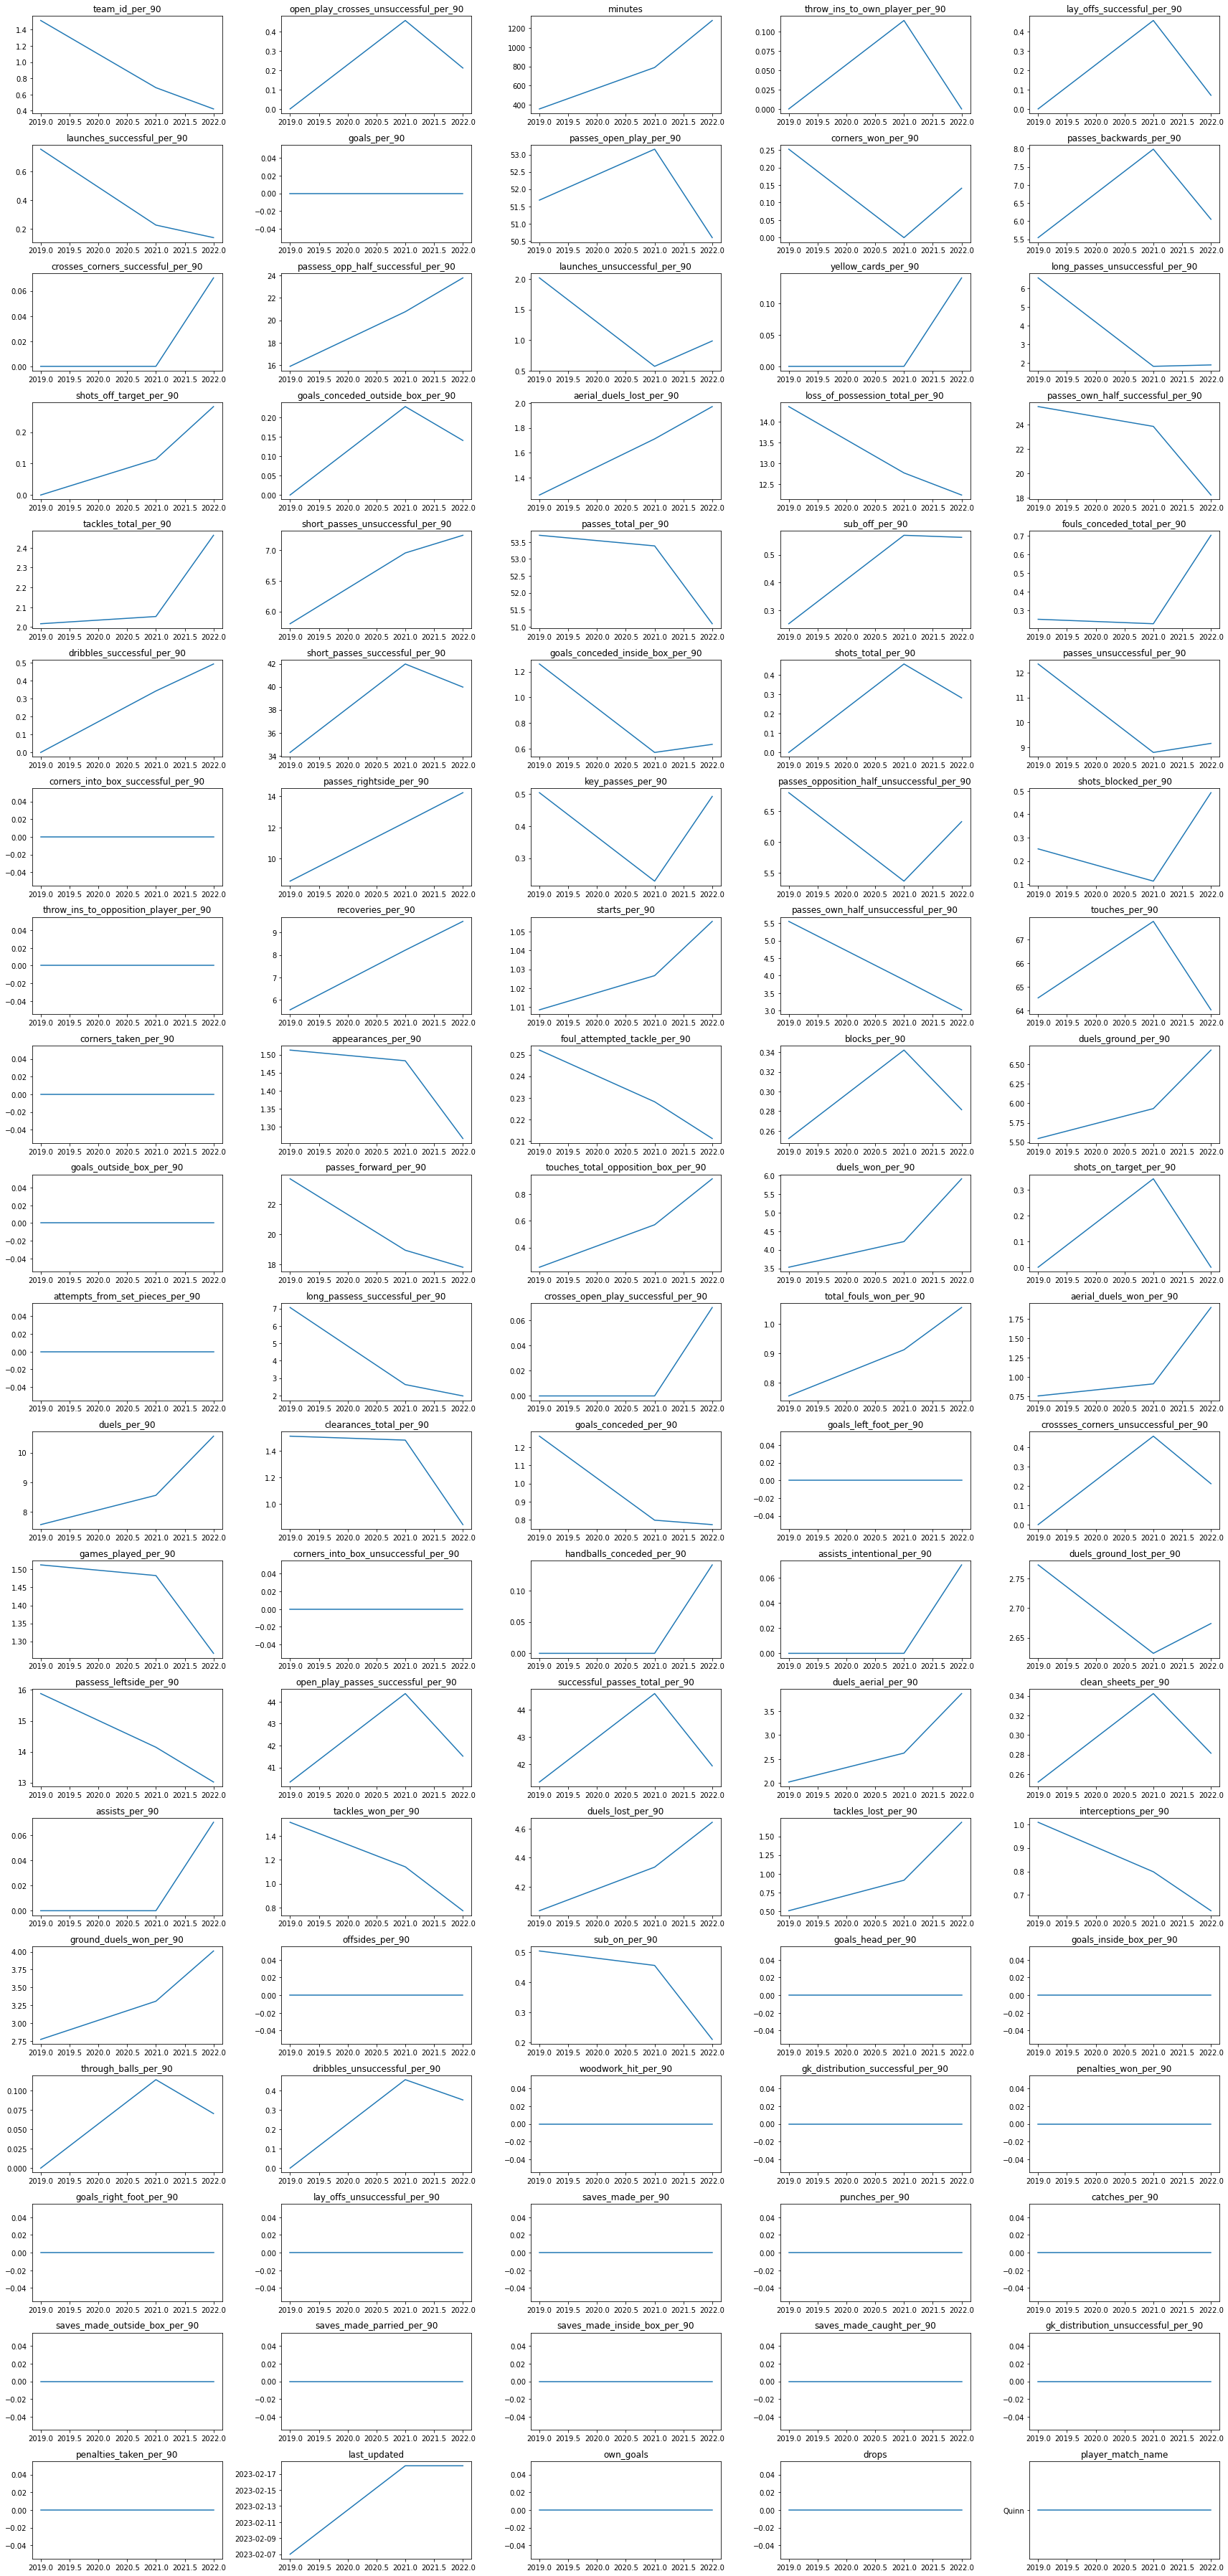

In [18]:
player_summary("Quinn")

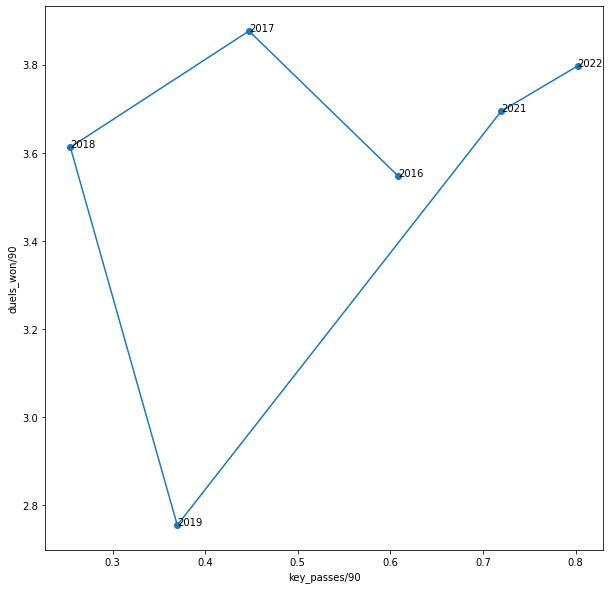

In [24]:
def plot_circular_scatter(name, a, a_per_90, b, b_per_90):
    subset = df[df["player_match_name"] == name].dropna(axis=1)
    
    x = subset[a]
    if a_per_90:
        x = x * 90 / subset["minutes"]
    y = subset[b]
    if b_per_90:
        y = y * 90 / subset["minutes"]
    t = subset.index.get_level_values(1)
    
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.clf()
    plt.scatter(x, y)
    plt.plot(x, y)
    plt.xlabel(a + ("/90" if a_per_90 else ""))
    plt.ylabel(b + ("/90" if b_per_90 else ""))
    for i, txt in enumerate(t):
        plt.annotate(txt, (x.iloc[i], y.iloc[i]))

    
plot_circular_scatter("L. Barnes", "key_passes", True, "duels_won", True)

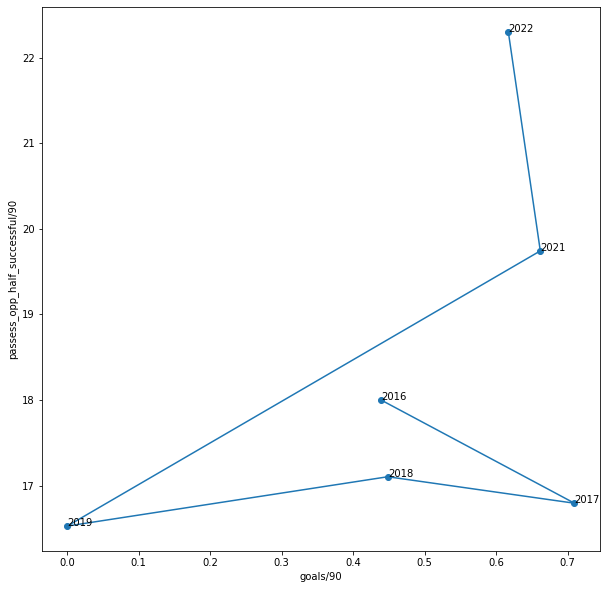

In [29]:
plot_circular_scatter("M. Rapinoe", "goals", True, "passess_opp_half_successful", True)

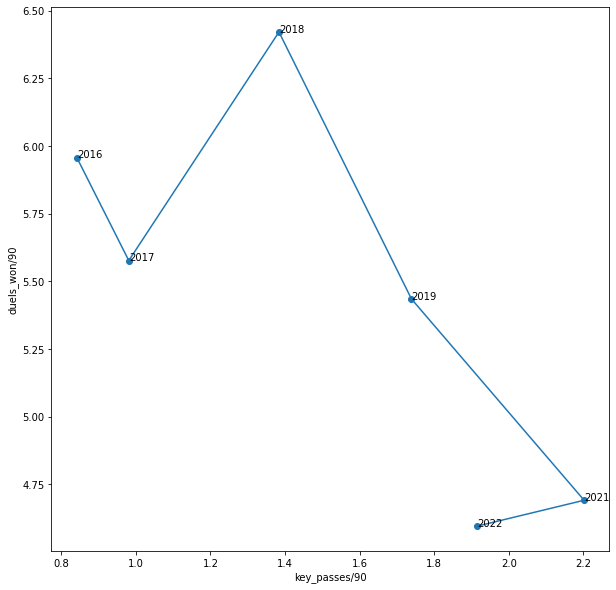

In [68]:
plot_circular_scatter("J. Fishlock", "key_passes", True, "duels_won", True)

<Figure size 4000x3600 with 0 Axes>

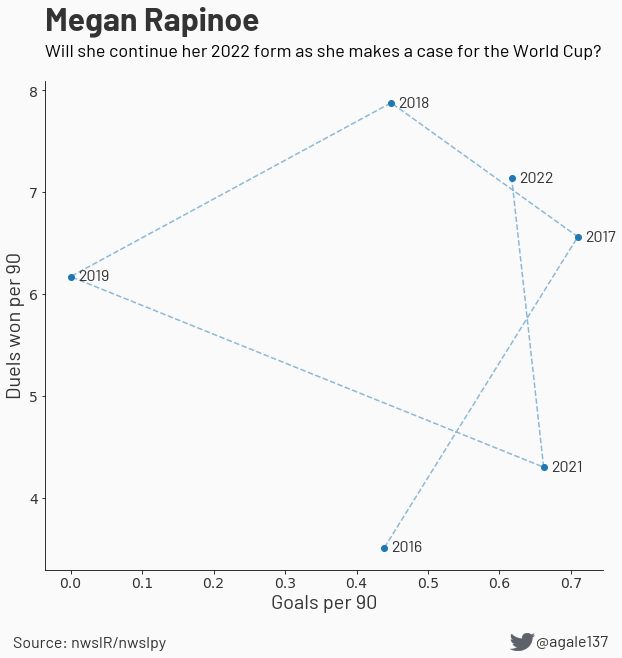

In [61]:
def plot_formatted_circular_scatter(name, x, y, title, subtitle, label_offset):
    subset = df[df["player_match_name"] == name].dropna(axis=1)

    # Clean data to be per 90 minutes played
    x_data = subset[x["metric"]]
    if x["per_90"]:
        x_data = x_data * 90 / subset["minutes"]
    y_data = subset[y["metric"]]
    if y["per_90"]:
        y_data = y_data * 90 / subset["minutes"]
    t = subset.index.get_level_values(1)

    # Setup
    plt.rcParams["figure.figsize"] = (10, 9)
    plt.figure(dpi=400)
    fig, ax = plt.subplots()
    fig.patch.set_facecolor(Colors.WHITE)
    ax.set_facecolor(Colors.WHITE)

    # Plot data
    ax.scatter(x_data, y_data)
    ax.plot(x_data, y_data, alpha=0.5, linestyle="--")
    for i, year in enumerate(t):
        adjust = label_offset(year)
        plt.annotate(
            year,
            (x_data.iloc[i] + adjust[0], y_data.iloc[i] + adjust[1]),
            fontproperties=Fonts.BARLOW,
            size=16,
            color=Colors.BLACK,
        )

    # Axes
    plt.xlabel(x["label"], fontproperties=Fonts.BARLOW, size=20, color=Colors.BLACK)
    plt.ylabel(y["label"], fontproperties=Fonts.BARLOW, size=20, color=Colors.BLACK)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(axis="both", which="major", labelsize=14, labelcolor=Colors.BLACK)

    # Title
    plt.title(
        title,
        fontproperties=Fonts.BARLOW_BOLD,
        size=32,
        x=0,
        y=1.09,
        ha="left",
        color=Colors.BLACK,
    )

    # Subtitle
    ax.text(
        0,
        1.05,
        subtitle,
        fontproperties=Fonts.BARLOW,
        size=18,
        ha="left",
        transform=ax.transAxes,
    )

    add_twitter_handle(fig, x=0.77, y=0, fs=16, w=0.03)
    add_source(fig, "nwslR/nwslpy", fs=16, x=0.08, y=0)

    # Save image
    plt.savefig(
        "images/circular-scatter/"
        + name.replace(". ", "")
        + "_"
        + x["metric"]
        + "_"
        + y["metric"]
        + ".png",
        bbox_inches="tight",
        pad_inches=0.5,
    )


plot_formatted_circular_scatter(
    "M. Rapinoe",
    {"metric": "goals", "per_90": True, "label": "Goals per 90"},
    {
        "metric": "duels_won",
        "per_90": True,
        "label": "Duels won per 90",
    },
    "Megan Rapinoe",
    "Will she continue her 2022 form as she makes a case for the World Cup?",
    lambda x: (0.01, -0.04),
)